# MAST387 Midterm Exam

## Student: Tristan Lafleur (ID 40245238)

### Question A - The Canadish language in basic Python

In [1]:
import re

#### 1) Write a function Canadish 1 that takes as input a string sentence in containing an English sentence and returns a string sentence out containing to sentence obtained by applying Rule 1 only. In this first version of the program, you can assume that the sentence only contains lowercase letters or single spaces and, but not other characters such as punctuation marks. Test your function on the string "this is almost a canadish sentence" and print the corresponding output.

In [2]:
def canadaish_1(sentence_in):
    sentence_out = []

    vowel_regex = r"[aeiouy]"

    for word in sentence_in.split(" "):
        vowel_match = re.match(vowel_regex, word, re.I)
        if vowel_match != None:
            sentence_out.append(f"{word}eh")
        else:
            sentence_out.append(word)

    return " ".join(sentence_out)


canadaish_1("this is almost a canadish sentence")

'this iseh almosteh aeh canadish sentence'

#### 2) Write a function Canadish 12 that takes as input an English sentence sentence in and returns a sentence sentence out obtained by applying Rules 1 and 2. You can still assume that there are only lowercase letters and single spaces. Test your function on the string "this is a canadish sentence" and print the corresponding output.

In [3]:
def canadaish_12(sentence_in):
    buffer_sentence = canadaish_1(sentence_in)
    buffer_words = buffer_sentence.split(" ")

    sentence_out = []

    consonant_rgx = r"^[^aeiouy]|ch|pr|str"

    for word in buffer_words:
        conconant_match = re.match(consonant_rgx, word, re.I)
        if conconant_match != None:
            start_pos, end_pos = conconant_match.span()
            sentence_out.append(f"{word[end_pos:]}{word[start_pos:end_pos]}ey")
        else:
            sentence_out.append(word)

    return " ".join(sentence_out)


canadaish_12("this is almost a canadish sentence")

'histey iseh almosteh aeh anadishcey entencesey'

#### 3) Now, write an improved version of Canadish 12 called Canadish 12 case that is able to handle sentences containing single spaces and words where either the first letter or all the letters are capitalized (such as "Word" or "WORD"). Note that capitalization should be fixed after translation. For example, the Candish translation of the sentence "The weather in Montreal is AWESOME" should be "Ethey eatherwey ineh Ontrealmey iseh AWESOMEEH". Test your function on this sample sentence and print the output to verify that your implementation is correct.

#### [Hint: It might be useful to first check whether a certain word contains upper case letters, translate its lower case version, and then add capitalized letters in the translated sentence where appropriate.]

In [6]:
def canadaish_12_case(sentence_in):
    buffer_sentence = canadaish_1(sentence_in)
    buffer_words = buffer_sentence.split(" ")

    sentence_out = []

    capital_rgx = r"[A-Z]+"

    consonant_rgx = r"^[^aeiouy]|ch|pr|str"

    for word in buffer_words:
        capital_match = re.match(capital_rgx, word)

        conconant_match = re.match(consonant_rgx, word, re.I)
        if conconant_match != None:
            start_pos, end_pos = conconant_match.span()
            conconant_replacement = word[start_pos:end_pos].lower() if capital_match != None else word[start_pos:end_pos]

            word_start_replacement = word[end_pos:]
            word_start_replacement = word_start_replacement[0].upper() + word_start_replacement[1:] if capital_match != None else word_start_replacement
            sentence_out.append(f"{word_start_replacement}{conconant_replacement}ey")
        else:
            sentence_out.append(word)

    new_sentence = " ".join(sentence_out)

    return new_sentence


canadaish_12_case("The weather in Montreal is AWESOME")

'Hetey eatherwey ineh Ontrealmey iseh AWESOMEeh'

#### 4) Create a function Canadish which improves Canadish 12 case by handling sentences containing special characters (such as punctuation marks) and not only letters. In the translated sentence, special characters should appear in the same positions as in the initial sentence. For example, the translation of "One, TWO!" should be "Oneeh, OTWEY!". Test your function on the sentence "Here is a Canadish sentence with bells and whistles--YES, this is it! You made it." and print the corresponding output.

#### [Hint: The method isalpha() can be useful.]

In [10]:
def canadaish_12_case_special(sentence_in):
    buffer_sentence = canadaish_1(sentence_in)
    buffer_words = buffer_sentence.split(" ")

    sentence_out = []

    capital_rgx = r"[A-Z]+"

    consonant_rgx = r"^[^aeiouy]|ch|pr|str"

    special_characters_rgx = r"[.,!?]"

    for word in buffer_words:
        capital_match = re.match(capital_rgx, word)

        conconant_match = re.match(consonant_rgx, word, re.I)

        special_character_match = re.search(special_characters_rgx, word)

        if conconant_match != None:
            start_pos, end_pos = conconant_match.span()
            conconant_replacement = word[start_pos:end_pos].lower() if capital_match != None else word[start_pos:end_pos]

            word_start_replacement = word[end_pos:]
            word_start_replacement = word_start_replacement[0].upper() + word_start_replacement[1:] if capital_match != None else word_start_replacement
            buffer_word = f"{word_start_replacement}{conconant_replacement}ey"
            if special_character_match != None:
                buffer_word + word[special_character_match.pos]

            sentence_out.append(buffer_word)
        else:
            sentence_out.append(word)

    new_sentence = " ".join(sentence_out)

    return new_sentence.capitalize()


canadaish_12_case_special("Here is a Canadish sentence with bells and whistles--YES, this is it! You made it.")

'Erehey iseh aeh anadishcey entencesey ithwey ellsbey andeh histles--yes,wey histey iseh it!eh youeh ademey it.eh'

### Question B - Steepest gradient descent with NumPy

In [ ]:
import numpy
import matplotlib.pyplot as plt

#### 1) Implement a function steepest GD(A, b, TOL, Nmax) that given a matrix A, a vector b, a positive tolerance TOL and a maximum number of iterations Nmax, returns a matrix X whose columns are the approximations produced by steepest gradient descent.

In [ ]:
def steepest_GD(A, b, TOL, Nmax):
    x = numpy.zeros((b.shape[0],))

    X = numpy.ndarray((1,x.shape[0]), buffer=x)

    gradient_norms = []

    for i in range(Nmax):
        r = b - A @ x
        a = (r.dot(r)) / ((r.T @ A).dot(r))
        x = x + a * r
        X = numpy.vstack((X, x))

        gradient_norm = numpy.linalg.norm(r)
        gradient_norms.append(gradient_norm)

        if gradient_norm <= TOL:
            break

    return X.T, gradient_norms


buff_A = numpy.array([[2.0,1.0,0.0,0.0],[1.0,2.0,1.0,0.0],[0.0,1.0,2.0,1.0],[0.0,0.0,1.0,2.0]])
A = numpy.ndarray((4,4), buffer=buff_A)

b = numpy.ones((4,))

TOL = 1e-8

max_iter = 1000

solution_mat, gradient_norms = steepest_GD(A, b, TOL, max_iter)

solution_mat

array([[0.        , 0.28571429, 0.38095238, 0.39455782, 0.39909297,
        0.39974085, 0.39995681, 0.39998766, 0.39999794, 0.39999941,
        0.3999999 , 0.39999997, 0.4       , 0.4       , 0.4       ],
       [0.        , 0.28571429, 0.19047619, 0.20408163, 0.19954649,
        0.20019436, 0.1999784 , 0.20000926, 0.19999897, 0.20000044,
        0.19999995, 0.20000002, 0.2       , 0.2       , 0.2       ],
       [0.        , 0.28571429, 0.19047619, 0.20408163, 0.19954649,
        0.20019436, 0.1999784 , 0.20000926, 0.19999897, 0.20000044,
        0.19999995, 0.20000002, 0.2       , 0.2       , 0.2       ],
       [0.        , 0.28571429, 0.38095238, 0.39455782, 0.39909297,
        0.39974085, 0.39995681, 0.39998766, 0.39999794, 0.39999941,
        0.3999999 , 0.39999997, 0.4       , 0.4       , 0.4       ]])

#### 2) Plot the residual norm ∥ri∥ as a function of the iteration i using a logarithmic scale on the y axis. Does the residual seem to converge to 0?

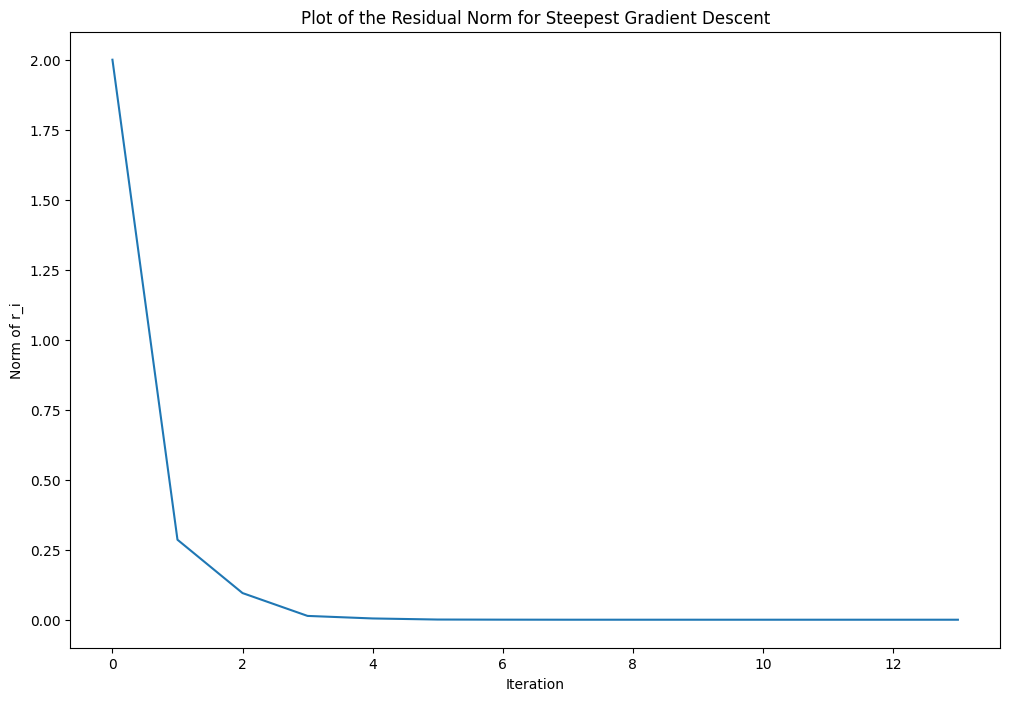

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(range(len(gradient_norms)), gradient_norms)
plt.xlabel("Iteration")
plt.ylabel("Norm of r_i")
plt.title("Plot of the Residual Norm for Steepest Gradient Descent")

plt.show()

- From the plot above, it does look like the norm converges to zero rather quickly.

#### 3) Plot the values f(xi) as a function of i (recall equation (1) above). Does steep gradient descent seem to minimize the function f ? What is the approximate minimum value of f ?

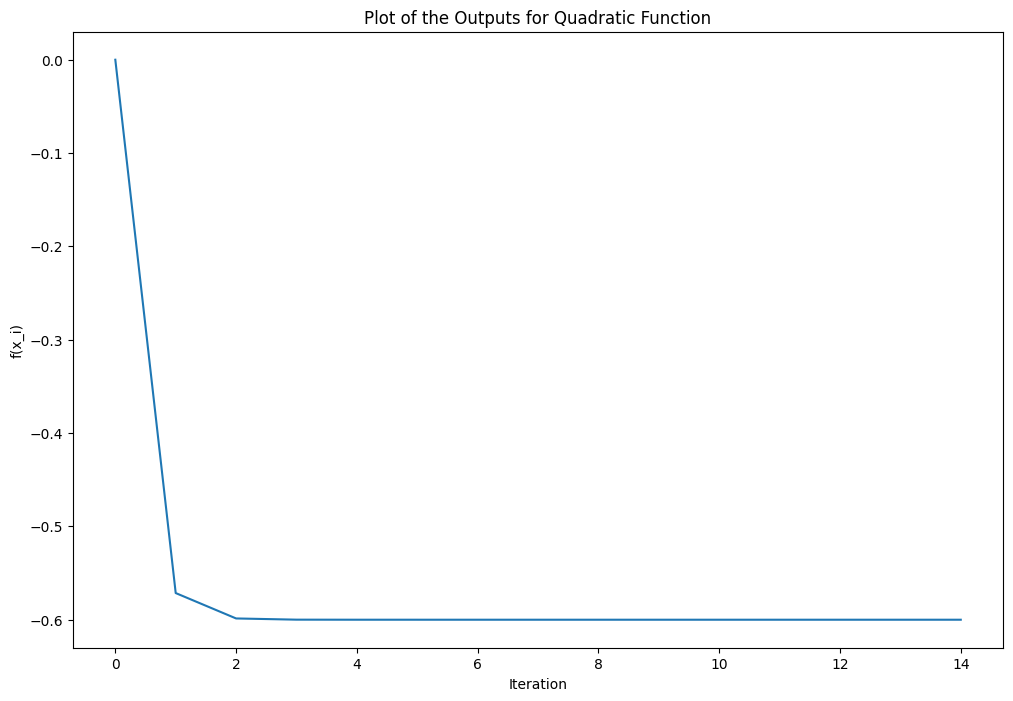

In [ ]:
def quad_func(x, A, b):
    return 1/2 * x.T @ A @ x - x.T @ b


function_values = []

for solution_entry in solution_mat.T:
    function_values.append(quad_func(solution_entry, A, b))

plt.figure(figsize=(12, 8))
plt.plot(range(len(function_values)), function_values)
plt.xlabel("Iteration")
plt.ylabel("f(x_i)")
plt.title("Plot of the Outputs for Quadratic Function")

plt.show()

- It would seem that the steepest gradient descent did in fact converge to a minimum point of -0.6.

#### 4) Create a function test matrix(n, k, c) that takes two integers n and k and a positive real number c as inputs and returns an n × n matrix A defined above. Try to vectorize your code as much as you can. Print the outputs of test matrix(4, 2, 2) and test matrix(6, 4, 3).

In [ ]:
def test_matrix(n, k, c):
    result = numpy.zeros((n,n))

    for i in range(n):
        for j in range(n):
            l = numpy.abs(i - j)
            result[i][j] = k**c if i == j else k - l if l < k else 0

    return result


print(test_matrix(4, 2, 2))

print(test_matrix(6, 4, 3))

[[4. 1. 0. 0.]
 [1. 4. 1. 0.]
 [0. 1. 4. 1.]
 [0. 0. 1. 4.]]
[[64.  3.  2.  1.  0.  0.]
 [ 3. 64.  3.  2.  1.  0.]
 [ 2.  3. 64.  3.  2.  1.]
 [ 1.  2.  3. 64.  3.  2.]
 [ 0.  1.  2.  3. 64.  3.]
 [ 0.  0.  1.  2.  3. 64.]]


#### 5) Test the steepest gradient descent with TOL = 10−4 and Nmax = 1000 on different matrices A generated using test matrix(n, k, c) with n = 100, k = 5, 10, 15 and c = 1, 2, 3 and where b ∈ Rn is the vector of ones. Plot ∥ri∥ as a function of i in loglog scale for all the combinations of parameters k and c considered (all curves should be in the same graph). For which combination of parameters does the residual norm converges faster? Are there combinations of parameters for which the maximum number of iterations is reached?

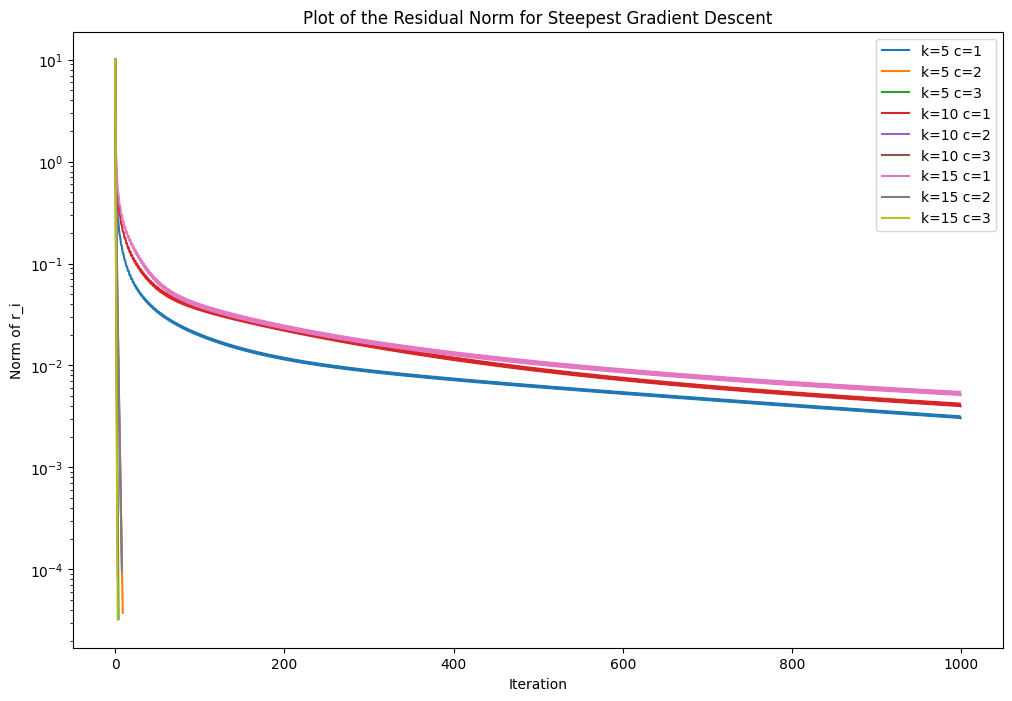

In [ ]:
TOL = 10**-4

num_iter = 1000

n = 100

b = numpy.ones((n,))

k_values = [5,10,15]

c_values = [1,2,3]

plt.figure(figsize=(12, 8))
plt.xlabel("Iteration")
plt.ylabel("Norm of r_i")
plt.title("Plot of the Residual Norm for Steepest Gradient Descent")

for k in k_values:
    for c in c_values:
        A = test_matrix(n, k, c)
        solution_mat, gradient_norms = steepest_GD(A, b, TOL, num_iter)
        plt.plot(range(len(gradient_norms)), gradient_norms, label=f"k={k} c={c}")

plt.yscale("log")
plt.legend()
plt.show()


- It seems that the best configuration was k = 5 and c = 3. The configurations that were generally faster would be where c > 1.
- Anything outside of the mentioned configuration choices had reached the maximum iteration number.

#### 6) The condition number, defined as the ratio between the largest and the smallest singular value of a symmetric matrix A and implemented by numpy.linalg.cond is typically a good proxy for the speed of convergence of gradient descent. We want to test this hypothesis. To do this, compute the condition numbers of the matrices considered in part 5. Does a smaller condition number correspond to a faster convergence of the algorithm?

In [ ]:
condition_numbers = []

for k in k_values:
    for c in c_values:
        A = test_matrix(n, k, c)
        condition_numbers.append(numpy.linalg.cond(A))

print(condition_numbers)

[4041.835272923015, 2.246950840760151, 1.2078785973895023, 4839.826249924859, 2.102382583779909, 1.1002373586160277, 5699.105835943377, 2.053868624512193, 1.0658782117391346]


- From the list of condition numbers, it seems that there does exist a correlation between the condition number and the solution speed exists. Namely, any condition number that associated with a fast configuration was very small relative to the others.

### Question 3 - pandas watch Netflix

In [24]:
import pandas
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm

#### 1) Load the dataset netflix.csv (see Moodle) and assign it to a pandas dataframe. This data set contains the list of shows added to Netflix from 2008 to 2019.

In [15]:
netflix_dataframe = pandas.read_csv("netflix.csv")
netflix_dataframe.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


#### 2) What’s the proportion between TV Show and Movies on Netflix? Give the percentages and use a suitable visualization strategy to illustrate the situation.

TV Show propertion: 32.52%
TV Show propertion: 67.48%


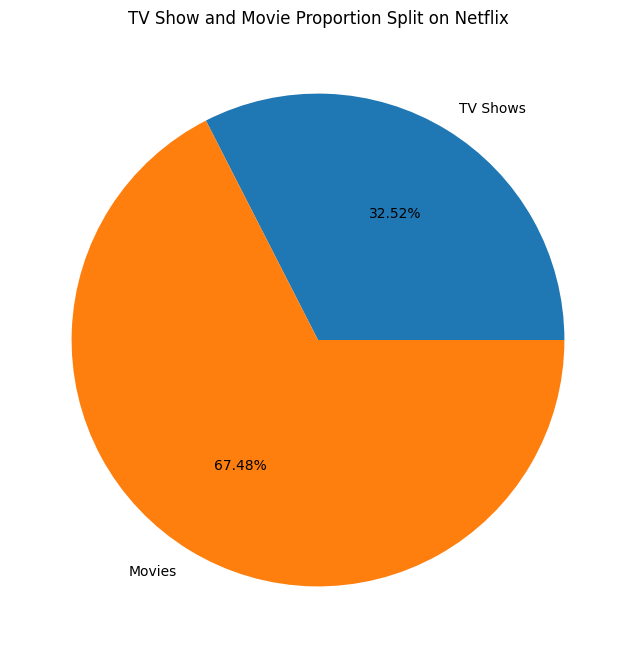

In [19]:
tv_shows = netflix_dataframe.type[netflix_dataframe.type == "TV Show"]

movies = netflix_dataframe.type[netflix_dataframe.type == "Movie"]
print(f"TV Show propertion: {len(tv_shows) / len(netflix_dataframe) * 100:.2f}%")

print(f"TV Show propertion: {len(movies) / len(netflix_dataframe) * 100:.2f}%")

labels = ["TV Shows", "Movies"]

values = [len(tv_shows) / len(netflix_dataframe) * 100, len(movies) / len(netflix_dataframe) * 100]

plt.figure(figsize=(12, 8))
plt.title("TV Show and Movie Proportion Split on Netflix")
plt.pie(values, labels=labels, autopct='%1.2f%%')

plt.show()

#### 3) Add the following columns to your dataframe:
#### - date added dt: contains the conversion of the the date added column using the pd.to date time method.
#### - year added: the year in which the show was added to Netflix (use the dt.year attribute of the date added dt values)
#### - month added: the month in which the show was added to Netflix (use the dt.month attribute of the date added dt values)
#### - season count: contains the numbers of seasons of the show (if available) and it is NaN otherwise
#### - duration min: Contains the duration in minutes of the show (if available) and it is NaN otherwise
#### Print the first 5 rows of the modified dataframe.


In [21]:
def extract_num_seasons(duration_ele):
    return int(duration_ele[0]) if "Season" in duration_ele else numpy.NaN


def extract_duration_min(duration_ele):
    return int(duration_ele.split(" ")[0]) if "min" in duration_ele else numpy.NaN


netflix_dataframe["date_added_dt"] = pandas.to_datetime(netflix_dataframe["date_added"])

netflix_dataframe["year_added"] = netflix_dataframe["date_added_dt"].dt.year

netflix_dataframe["month_added"] = netflix_dataframe["date_added_dt"].dt.month

netflix_dataframe["season_count"] = netflix_dataframe["duration"].apply(extract_num_seasons)

netflix_dataframe["duration_min"] = netflix_dataframe["duration"].apply(extract_duration_min)

netflix_dataframe.head()

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,date_added_dt,year_added,month_added,season_count,duration_min
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show,2019-11-30,2019.0,11.0,1.0,NaN
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie,2019-11-30,2019.0,11.0,NaN,67.0
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie,2019-11-30,2019.0,11.0,NaN,135.0
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie,2019-11-29,2019.0,11.0,NaN,106.0
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show,NaT,NaN,NaN,2.0,NaN


#### 4) Using a suitable visualization strategy, show the number of Movies and TV Shows added to Netflix from 2008 to 2019 as a function of the year. What do you observe?

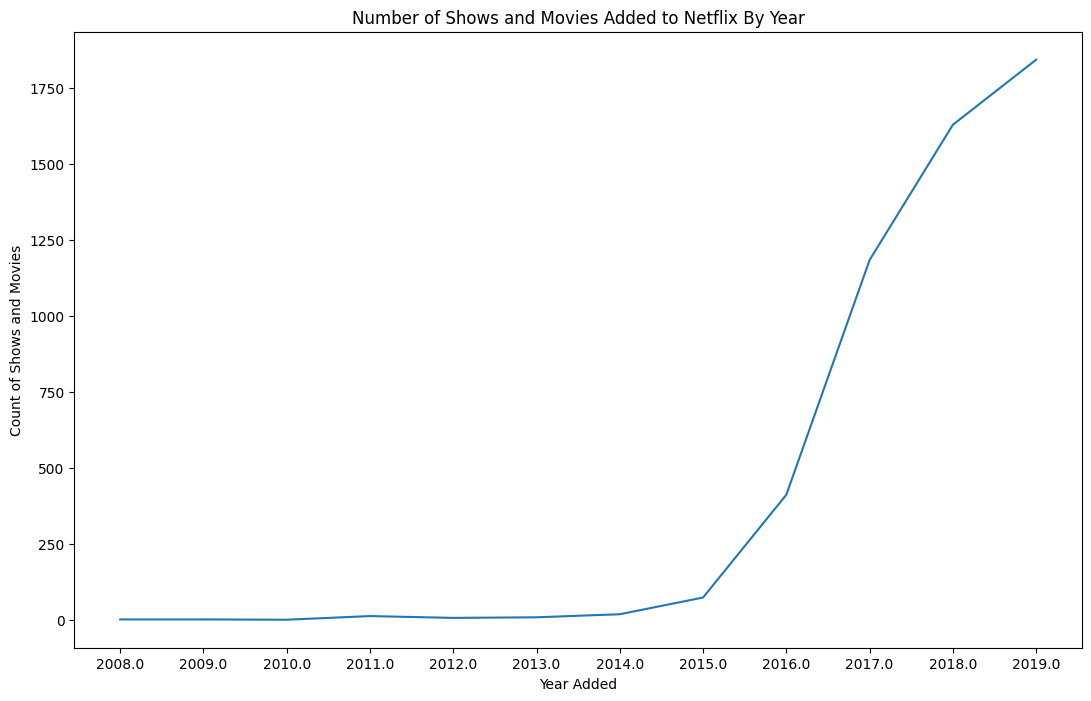

In [ ]:
year_groups = netflix_dataframe.groupby(["year_added"])
size_series = year_groups.size()

fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(range(1, len(size_series.values) + 1), size_series.values)
ax.set_xticks(range(1, len(size_series.values) + 1))
ax.set_xticklabels(size_series.index)
ax.set_xlabel("Year Added")
ax.set_ylabel("Count of Shows and Movies")
ax.set_title("Number of Shows and Movies Added to Netflix By Year")

plt.show()

- From the data it can be observed that there were far more shows and movies added later on as netflix became more and more widely used.

#### 5) Using a suitable visualization strategy, show the number of Movies and TV Shows as a function of the year in which they where released. What do you observe?

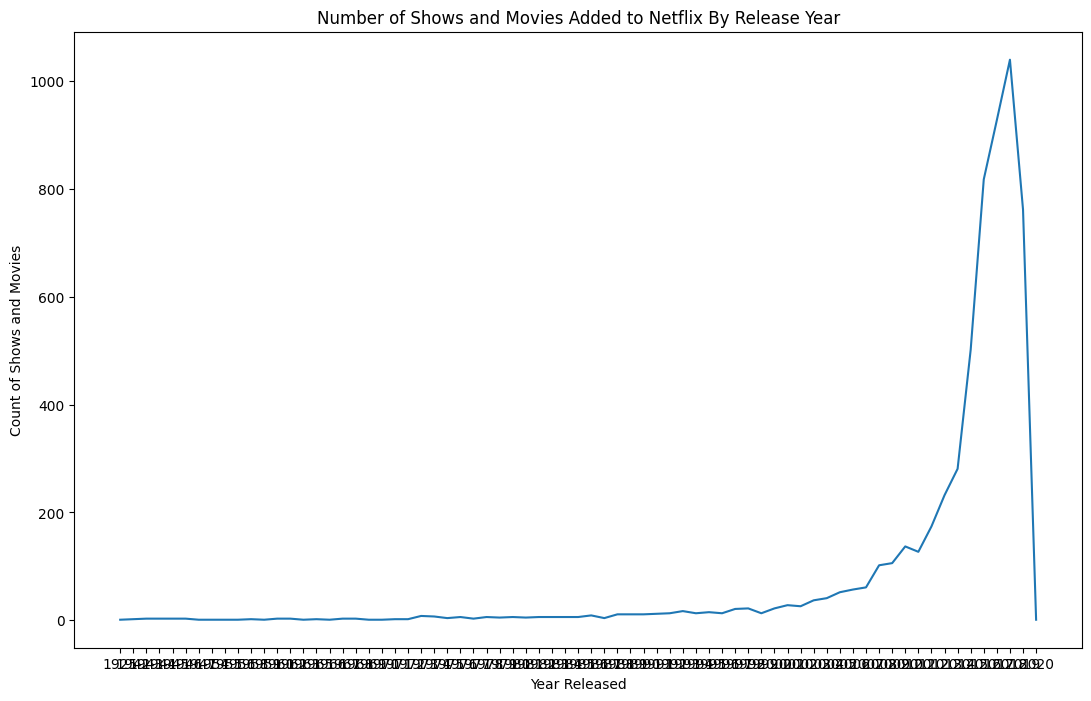

In [23]:
year_groups = netflix_dataframe.groupby(["release_year"])
size_series = year_groups.size()

fig, ax = plt.subplots(figsize=(13, 8))
ax.plot(range(1, len(size_series.values) + 1), size_series.values)
ax.set_xticks(range(1, len(size_series.values) + 1))
ax.set_xticklabels(size_series.index)
ax.set_xlabel("Year Released")
ax.set_ylabel("Count of Shows and Movies")
ax.set_title("Number of Shows and Movies Added to Netflix By Release Year")

plt.show()

- Once more, we can see that relatively few shows and movies dating prior to 2008 were added to netflix.

#### 6) Print the list of the 10 oldest shows (by release date).

In [ ]:
sorted_shows = netflix_dataframe.sort_values(["release_year"], ascending=True)

sorted_shows[:10]

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,date_added_dt,year_added,month_added,season_count,duration_min
2154,81030762,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...,TV Show,2018-12-30,2018.0,12.0,1.0,NaN
4929,60027945,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-PG,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,Movie,2017-03-31,2017.0,3.0,NaN,52.0
4931,60027942,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-G,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,Movie,2017-03-31,2017.0,3.0,NaN,18.0
4946,70022548,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,NR,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,Movie,2017-03-31,2017.0,3.0,NaN,45.0
4943,70013050,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-14,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,Movie,2017-03-31,2017.0,3.0,NaN,82.0
4941,80119186,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,Movie,2017-03-31,2017.0,3.0,NaN,61.0
4936,80119194,The Memphis Belle: A Story of a\nFlying Fortress,William Wyler,NaN,United States,"March 31, 2017",1944,TV-PG,40 min,"Classic Movies, Documentaries",This documentary centers on the crew of the B-...,Movie,2017-03-31,2017.0,3.0,NaN,40.0
4938,80119191,The Negro Soldier,Stuart Heisler,NaN,United States,"March 31, 2017",1944,TV-14,40 min,"Classic Movies, Documentaries",This documentary urged African Americans to en...,Movie,2017-03-31,2017.0,3.0,NaN,40.0
4940,80119189,Tunisian Victory,"Frank Capra, John Huston, Hugh Stewart, Roy Bo...",Burgess Meredith,"United States, United Kingdom","March 31, 2017",1944,TV-PG,76 min,"Classic Movies, Documentaries",British and American troops join forces to lib...,Movie,2017-03-31,2017.0,3.0,NaN,76.0
4923,80119190,Know Your Enemy - Japan,"Frank Capra, Joris Ivens","Walter Huston, Dana Andrews",United States,"March 31, 2017",1945,TV-14,63 min,"Classic Movies, Documentaries",Though culturally insensitive by modern standa...,Movie,2017-03-31,2017.0,3.0,NaN,63.0


#### 7) Print the list of movies starring Keanu Reeves.

In [ ]:
netflix_dataframe.cast = netflix_dataframe.cast.fillna("")
keanu_reeves_movies = netflix_dataframe[netflix_dataframe.cast.str.contains("Keanu Reeves")]

keanu_reeves_movies

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type,date_added_dt,year_added,month_added,season_count,duration_min
85,60003508,The Gift,Sam Raimi,"Cate Blanchett, Giovanni Ribisi, Keanu Reeves,...",United States,"November 20, 2019",2000,R,112 min,"Dramas, Thrillers",When the authorities find a drowned woman's bo...,Movie,2019-11-20,2019.0,11.0,NaN,112.0
280,20557937,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",1999,R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...,Movie,2019-11-01,2019.0,11.0,NaN,136.0
281,60027695,The Matrix Reloaded,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",2003,R,138 min,"Action & Adventure, Sci-Fi & Fantasy","The crew must protect Zion, the last outpost s...",Movie,2019-11-01,2019.0,11.0,NaN,138.0
282,60031303,The Matrix Revolutions,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",2003,R,129 min,"Action & Adventure, Sci-Fi & Fantasy",The final installment in the Matrix trilogy fi...,Movie,2019-11-01,2019.0,11.0,NaN,129.0
669,70043303,The Lake House,Alejandro Agresti,"Keanu Reeves, Sandra Bullock, Dylan Walsh, Sho...",United States,"September 1, 2019",2006,PG,98 min,"Dramas, Romantic Movies, Sci-Fi & Fantasy",A lonely doctor begins writing letters to the ...,Movie,2019-09-01,2019.0,9.0,NaN,98.0
835,60031278,Something's Gotta Give,Nancy Meyers,"Jack Nicholson, Diane Keaton, Keanu Reeves, Fr...",United States,"August 1, 2019",2003,PG-13,128 min,"Comedies, Romantic Movies","Still sexy at 60, Harry Sanborn wines and dine...",Movie,2019-08-01,2019.0,8.0,NaN,128.0
1218,80202874,Always Be My Maybe,Nahnatchka Khan,"Ali Wong, Randall Park, James Saito, Michelle ...",United States,"May 31, 2019",2019,PG-13,102 min,"Comedies, Romantic Movies","Reunited after 15 years, famous chef Sasha and...",Movie,2019-05-31,2019.0,5.0,NaN,102.0
3041,70278930,Man of Tai Chi,Keanu Reeves,"Keanu Reeves, Tiger Chen, Karen Mok, Simon Yam...","United States, China, Hong Kong","July 26, 2018",2013,R,105 min,"Action & Adventure, Dramas","In this kung fu tale set in Beijing, a young m...",Movie,2018-07-26,2018.0,7.0,NaN,105.0
4144,80192097,SPF-18,Alex Israel,"Carson Meyer, Noah Centineo, Bianca Santos, Ja...",United States,"October 30, 2017",2017,PG-13,75 min,"Dramas, Romantic Movies, Sports Movies",The arrival of an enigmatic struggling musicia...,Movie,2017-10-30,2017.0,10.0,NaN,75.0
4301,80099204,The Bad Batch,Ana Lily Amirpour,"Suki Waterhouse, Jason Momoa, Keanu Reeves, Ji...",United States,"September 22, 2017",2016,R,119 min,"Dramas, Independent Movies, Thrillers","Banished to a wasteland of undesirables, a you...",Movie,2017-09-22,2017.0,9.0,NaN,119.0


#### 8) Create a dataframe indexed by year added and whose columns are
#### - mean duration: mean of the movie duration for each year
#### - std duration: standard deviation of the movie duration for each year
#### - movies added: total number of movies added each year
#### - min added: total movie duration (in minutes) added each year
#### Print this dataframe and print the correlation between the columns movies added and min added. What do you observe? You can support your observations with suitable visualizations.

        mean_duration  std_duration  movies_added  min_added
2008.0      81.000000           NaN             2       81.0
2009.0      66.500000     53.033009             2      133.0
2010.0      84.000000           NaN             1       84.0
2011.0      93.461538      6.132093            13     1215.0
2012.0      76.500000     38.725530             7      306.0
                                 OLS Regression Results                                
Dep. Variable:              min_added   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2827.
Date:                Fri, 08 Nov 2024   Prob (F-statistic):                    1.28e-14
Time:                        22:40:59   Log-Likelihood:                         -115.83
No. Observations:                  12   AIC:                                      233.7
Df Residuals:     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


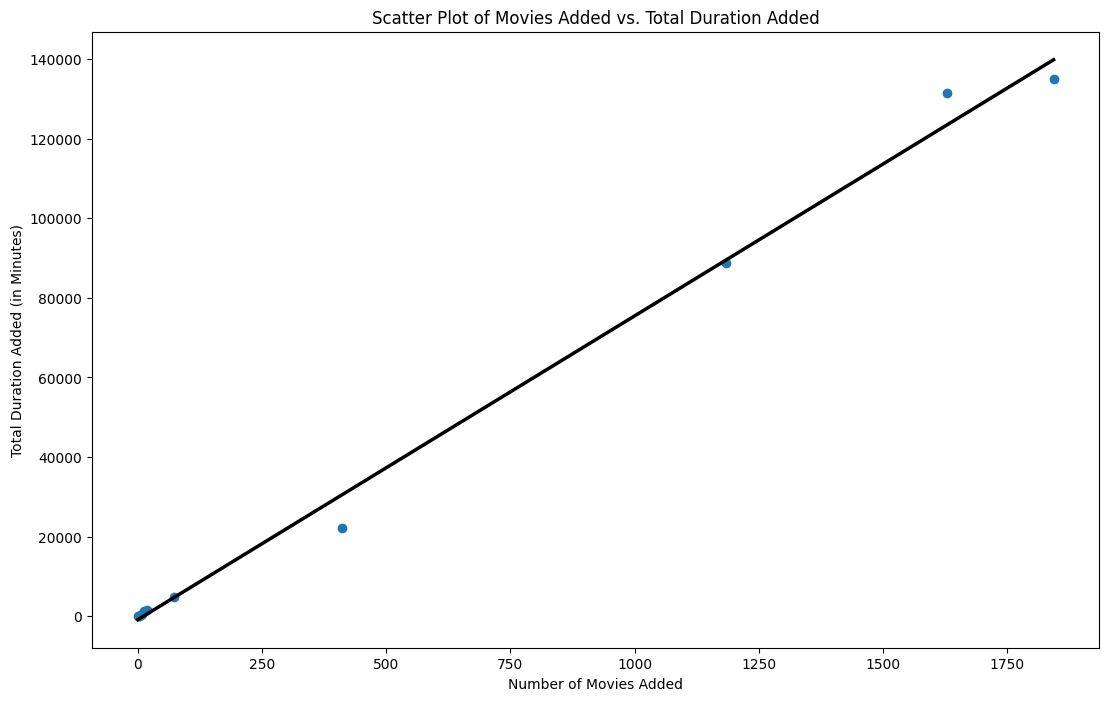

In [37]:
year_added_groups = netflix_dataframe.groupby(["year_added"])
mean_duration = year_added_groups.agg(movie_duration=pandas.NamedAgg(column="duration_min", aggfunc="mean")).to_numpy().reshape(-1)

std_duration = year_added_groups.agg(movie_duration=pandas.NamedAgg(column="duration_min", aggfunc="std")).to_numpy().reshape(-1)

movies_added = year_added_groups.size().to_numpy().reshape(-1)

min_added = year_added_groups.agg(movie_duration=pandas.NamedAgg(column="duration_min", aggfunc="sum")).to_numpy().reshape(-1)
netflix_stats_dataframe = pandas.DataFrame({ "mean_duration": mean_duration, "std_duration": std_duration, "movies_added": movies_added, "min_added": min_added }, index=year_added_groups.indices)
print(netflix_stats_dataframe.head())

model = sm.OLS(netflix_stats_dataframe.min_added, netflix_stats_dataframe.movies_added)
results = model.fit()
print(results.summary())

b, a = numpy.polyfit(netflix_stats_dataframe.movies_added, netflix_stats_dataframe.min_added, deg=1)

xseq = numpy.linspace(0, netflix_stats_dataframe.movies_added.max(), num=100)

fig, ax = plt.subplots(figsize=(13, 8))
ax.scatter(netflix_stats_dataframe.movies_added, netflix_stats_dataframe.min_added)
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)
ax.set_xlabel("Number of Movies Added")
ax.set_ylabel("Total Duration Added (in Minutes)")
ax.set_title("Scatter Plot of Movies Added vs. Total Duration Added")

plt.show()


- From the R-squared statistic and the F-statistic it seems there is a very close correlation between the minutes added and the movies added. This suggests that the total runtime of products added in per year comes from movies.

#### 9) Create a Python dictionary whose keys are the directors’ full names and whose values are a lists of movies they directed. Print the entries of your dictionary relative to the directors Sidharth Malhotra and Steven Spielberg.

In [ ]:
buffer_list = []

clean_director_series = netflix_dataframe.director.fillna("")
for entry in clean_director_series.unique():
    split_entry = entry.split(",")
    if len(split_entry) > 1:
        for split in split_entry:
            buffer_list.append(split.strip())
    else:
        buffer_list.append(split_entry[0])

director_list = buffer_list

director_dict = {}

for director in director_list:
    all_movies = netflix_dataframe[clean_director_series.str.contains(director)].title
    director_dict[director] = all_movies.to_list()

print(director_dict["Steven Spielberg"])

print(director_dict["Sidharth Malhotra"])

['The Adventures of Tintin', 'War Horse', 'Indiana Jones and the Kingdom of the Crystal Skull', 'Indiana Jones and the Last Crusade', 'Indiana Jones and the Raiders of the Lost Ark', 'Indiana Jones and the Temple of Doom', "Schindler's List", 'Lincoln']
['We Are Family']


#### 10) Create a pandas Series whose indices are the directors’ full names and whose values are the number of movies they directed. Print the list of people who directed more than 7 movies in decreasing order of number of movies directed. Visualize this list using a horizontal bar plot.

Jan Suter           21
Raúl Campos         20
Jay Karas           14
Marcus Raboy        14
Ram                 13
Jay Chapman         12
Vijay               10
Johnnie To           8
Shannon Hartman      8
Steven Spielberg     8
Martin Scorsese      8
McG                  8
Umesh Mehra          8
dtype: int64


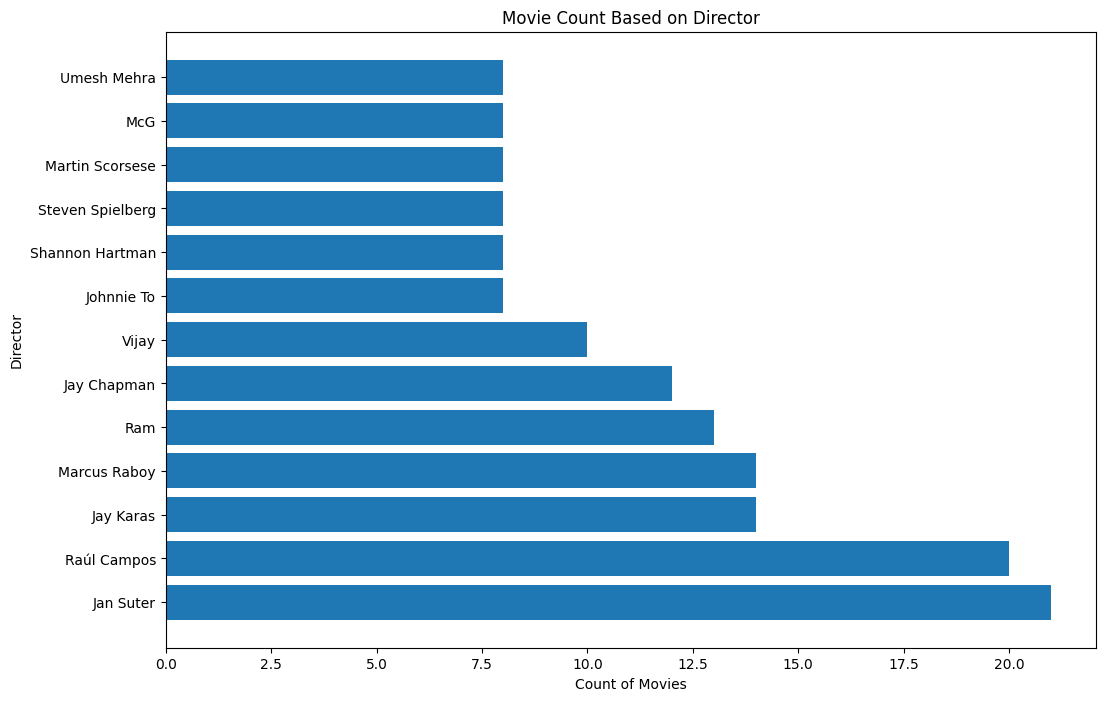

In [38]:
buffer_list = []

clean_director_series = netflix_dataframe.director.fillna("")
for entry in clean_director_series.unique():
    split_entry = entry.split(",")
    if len(split_entry) > 1:
        for split in split_entry:
            buffer_list.append(split.strip())
    else:
        buffer_list.append(split_entry[0])

director_list = buffer_list

director_dict = {}

for director in director_list:
    all_movies = netflix_dataframe[clean_director_series.str.contains(director)].title
    director_dict[director] = len(all_movies)

director_num_movies = pandas.Series(director_dict).sort_values(ascending=False)
more_than_7_movies = director_num_movies[(director_num_movies > 7) & (director_num_movies.index != "")]

print(more_than_7_movies)

plt.figure(figsize=(12, 8))
plt.ylabel("Director")
plt.xlabel("Count of Movies")
plt.title("Movie Count Based on Director")
plt.barh(more_than_7_movies.index, more_than_7_movies.values)

plt.show()

#### 11) Explore the dataset further and produce two more plots that you find interestingand comment about why you think they are interesting. Try to use the content in the fields cast, country, and description or other fields we haven’t used. Get creative!

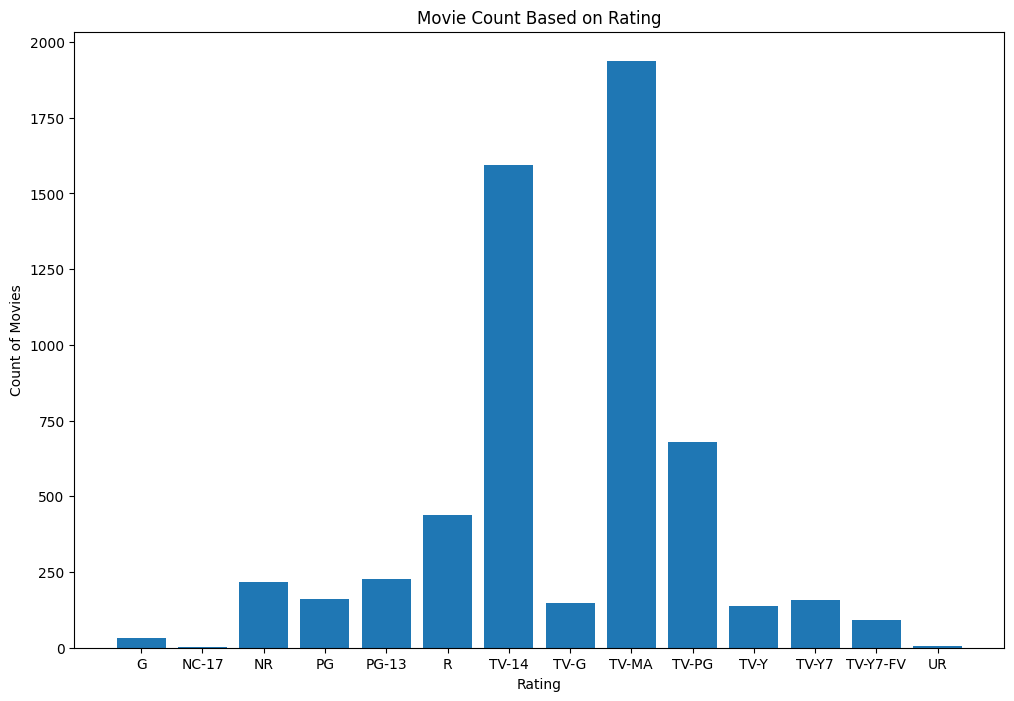

In [ ]:
rating_group = netflix_dataframe.groupby(["rating"]).size()
plt.figure(figsize=(12, 8))
plt.xlabel("Rating")
plt.ylabel("Count of Movies")
plt.title("Movie Count Based on Rating")
plt.bar(rating_group.index, rating_group.values)

plt.show()

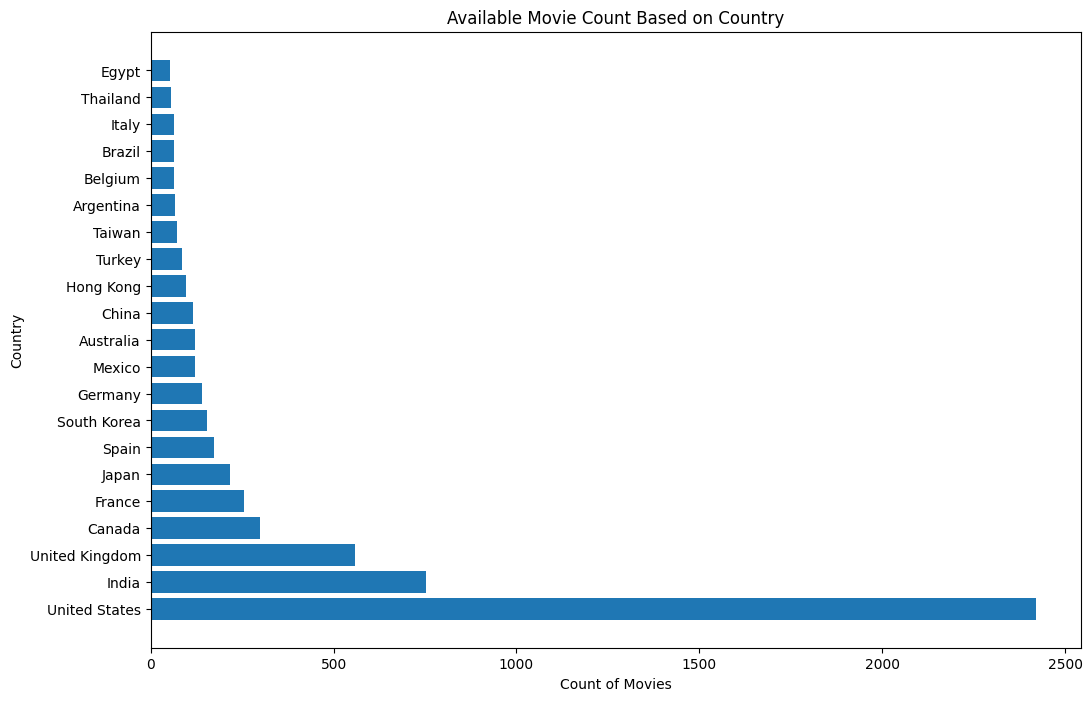

In [ ]:
buffer_list = []

clean_country_series = netflix_dataframe.country.fillna("")
for entry in clean_country_series.unique():
    split_entry = entry.split(",")
    if len(split_entry) > 1:
        for split in split_entry:
            buffer_list.append(split.strip())
    else:
        buffer_list.append(split_entry[0])

unique_countries = pandas.Series(buffer_list).unique()
unique_countries = unique_countries[unique_countries != ""]
unique_countries

country_dict = {}

for country in unique_countries:
    all_movies = netflix_dataframe[clean_country_series.str.contains(country)].title
    country_dict[country] = len(all_movies)

country_movie_count_series = pandas.Series(country_dict).sort_values(ascending=False)
more_than_50_movies = country_movie_count_series[country_movie_count_series > 50]

plt.figure(figsize=(12, 8))
plt.ylabel("Country")
plt.xlabel("Count of Movies")
plt.title("Available Movie Count Based on Country")
plt.barh(more_than_50_movies.index, more_than_50_movies.values)

plt.show()

- From what can be seen in the data, it looks like relative to ratings, there seems to be not as much programming for all audiences or kids. This maybe suggests that the dataset only takes into consideration the main netflix app rather than their specialized services.

- From the country chart we can see that the United States seems to have an  overwhelming amount of products available in the country compared to others. This may be due to the fdact that Netflix is an american company and therefore has better access.